In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

In [5]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [6]:
combine = [train_df, test_df]

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    print(total[total > 0])
    print(percent[percent > 0])
    

In [11]:
missingdata(train_df)

Cabin       687
Age         177
Embarked      2
dtype: int64
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


In [12]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


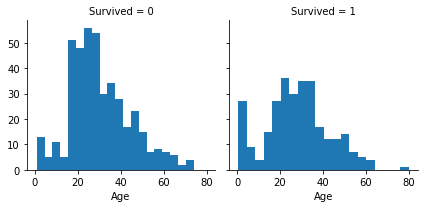

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

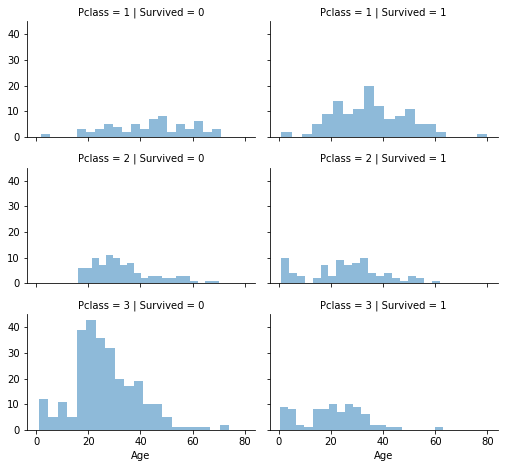

In [17]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [18]:
train_df['Cabin Present'] = (~train_df['Cabin'].isnull()).astype(int)
test_df['Cabin Present'] = (~train_df['Cabin'].isnull()).astype(int)

In [19]:
train_df[["Cabin Present", "Survived"]].groupby(['Cabin Present'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin Present,Survived
1,1,0.666667
0,0,0.299854


In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Present
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


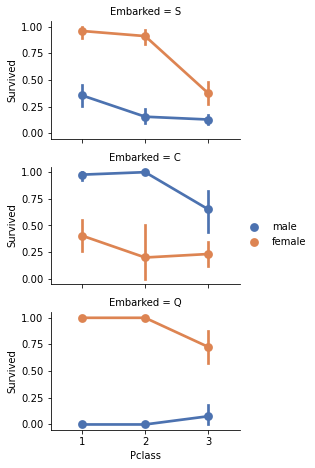

In [21]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [22]:


train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)


In [23]:
combine = [train_df, test_df]

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0


In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1


In [28]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 11))

In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,1,38.0,1,0,71.2833,C85,C,1,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,0,2
3,1,1,1,35.0,1,0,53.1000,C123,S,1,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,0,1


In [30]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [31]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present,Title
0,0,3,0,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,1,38.0,1,0,71.2833,C85,1,1,3
2,1,3,1,26.0,0,0,7.9250,NaN,0,0,2
3,1,1,1,35.0,1,0,53.1000,C123,0,1,3
4,0,3,0,35.0,0,0,8.0500,NaN,0,0,1


In [34]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [35]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,NaN,0,0,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C85,1,1,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,NaN,0,0,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,C123,0,1,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,NaN,0,0,1,"(32.252, 48.168]"


In [36]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present,Title
0,0,3,0,1.0,1,0,7.2500,NaN,0,0,1
1,1,1,1,2.0,1,0,71.2833,C85,1,1,3
2,1,3,1,1.0,0,0,7.9250,NaN,0,0,2
3,1,1,1,2.0,1,0,53.1000,C123,0,1,3
4,0,3,0,2.0,0,0,8.0500,NaN,0,0,1


In [37]:

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


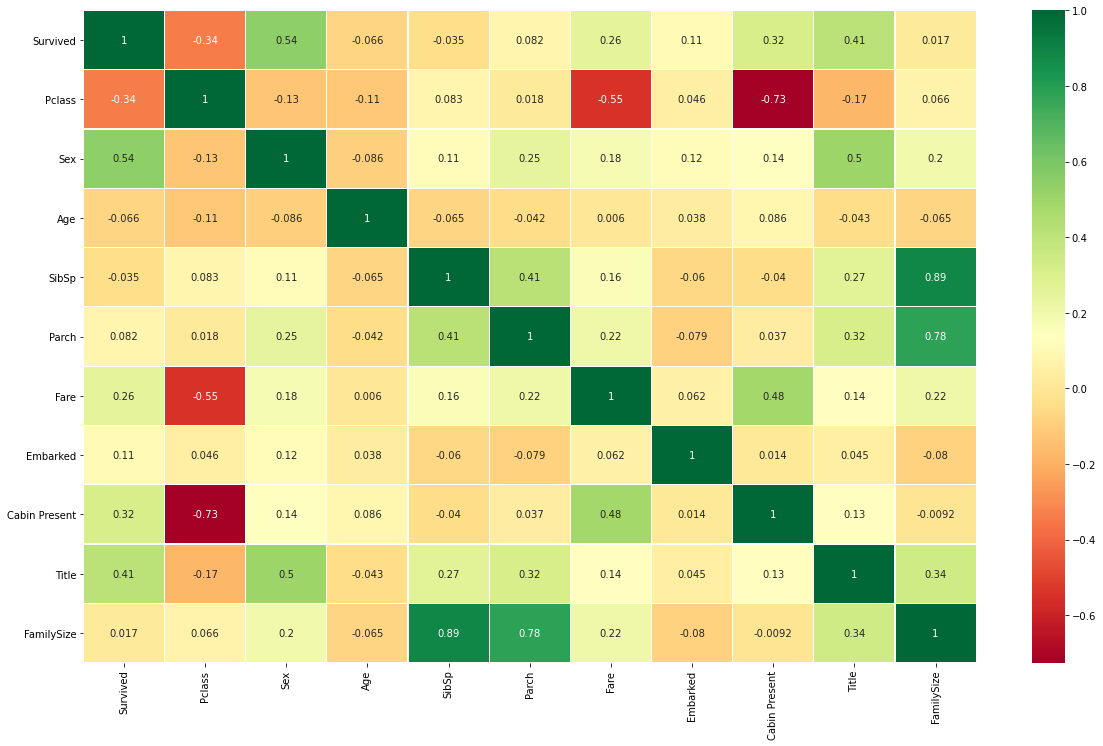

In [38]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [39]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present,Title,FamilySize
0,892,3,0,2.0,0,0,7.8292,NaN,2,0,1,1
1,893,3,1,2.0,1,0,7.0000,NaN,0,1,3,2
2,894,2,0,3.0,0,0,9.6875,NaN,2,0,1,1
3,895,3,0,1.0,0,0,8.6625,NaN,0,1,1,1
4,896,3,1,1.0,1,1,12.2875,NaN,0,0,3,3


In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [41]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Present,Title,FamilySize
0,0,3,0,1.0,1,0,0,NaN,0,0,1,2
1,1,1,1,2.0,1,0,3,C85,1,1,3,2
2,1,3,1,1.0,0,0,1,NaN,0,0,2,1
3,1,1,1,2.0,1,0,3,C123,0,1,3,2
4,0,3,0,2.0,0,0,1,NaN,0,0,1,1
5,0,3,0,1.0,0,0,1,NaN,2,0,1,1
6,0,1,0,3.0,0,0,3,E46,0,1,1,1
7,0,3,0,0.0,3,1,2,NaN,0,0,4,5
8,1,3,1,1.0,0,2,1,NaN,0,0,3,3
9,1,2,1,0.0,1,0,2,NaN,1,0,3,2


In [42]:
print(combine)


[     Survived  Pclass  Sex  Age  SibSp  Parch  Fare Cabin  Embarked  \
0           0       3    0  1.0      1      0     0   NaN         0   
1           1       1    1  2.0      1      0     3   C85         1   
2           1       3    1  1.0      0      0     1   NaN         0   
3           1       1    1  2.0      1      0     3  C123         0   
4           0       3    0  2.0      0      0     1   NaN         0   
..        ...     ...  ...  ...    ...    ...   ...   ...       ...   
886         0       2    0  1.0      0      0     1   NaN         0   
887         1       1    1  1.0      0      0     2   B42         0   
888         0       3    1  1.0      1      2     2   NaN         0   
889         1       1    0  1.0      0      0     2  C148         1   
890         0       3    0  1.0      0      0     0   NaN         2   

     Cabin Present  Title  FamilySize  
0                0      1           2  
1                1      3           2  
2                0      2 

In [43]:
train_df = train_df.drop(['Parch', 'SibSp', 'Cabin'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'Cabin'], axis=1)

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin Present,Title,FamilySize
0,0,3,0,1.0,0,0,0,1,2
1,1,1,1,2.0,3,1,1,3,2
2,1,3,1,1.0,1,0,0,2,1
3,1,1,1,2.0,3,0,1,3,2
4,0,3,0,2.0,1,0,0,1,1


In [45]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Cabin Present,Title,FamilySize
0,892,3,0,2.0,0,2,0,1,1
1,893,3,1,2.0,0,0,1,3,2
2,894,2,0,3.0,1,2,0,1,1
3,895,3,0,1.0,1,0,1,1,1
4,896,3,1,1.0,1,0,0,3,3


In [48]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [50]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

89.56


In [51]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

89.56
